# Spotify recommender

**3. Unsupervised Learning**: K-means clustering

**4. Song recommender**: If the input song is in top_200_songs list, it will recommend random song from the list. If it is not, it will recommend a song from the same cluster from spotify playlist

### Part 3: Unsupervised Learning: K-means clustering

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas import json_normalize

from sklearn.preprocessing import StandardScaler

In [2]:
#Read spotify playlist
df= pd.read_csv("df_w_audio_ft.re.csv")
df

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,If I Ever Feel Better,Phoenix,3AA8xNhDC0MpqwkGX3EP5V,0.755,0.553,6,-9.449,0,0.1070,0.04920,...,0.0646,0.836,119.700,audio_features,3AA8xNhDC0MpqwkGX3EP5V,spotify:track:3AA8xNhDC0MpqwkGX3EP5V,https://api.spotify.com/v1/tracks/3AA8xNhDC0Mp...,https://api.spotify.com/v1/audio-analysis/3AA8...,266600,4
1,Dance To The Underground,Radio 4,2i8lRhmZNKaM1ypHwRybuD,0.667,0.667,7,-6.267,1,0.0388,0.00013,...,0.0711,0.843,130.321,audio_features,2i8lRhmZNKaM1ypHwRybuD,spotify:track:2i8lRhmZNKaM1ypHwRybuD,https://api.spotify.com/v1/tracks/2i8lRhmZNKaM...,https://api.spotify.com/v1/audio-analysis/2i8l...,243213,4
2,How We Do,Mount Sims,4flxgPC0426CEeSrzQIic0,0.826,0.601,10,-3.966,0,0.0515,0.19500,...,0.0700,0.948,126.971,audio_features,4flxgPC0426CEeSrzQIic0,spotify:track:4flxgPC0426CEeSrzQIic0,https://api.spotify.com/v1/tracks/4flxgPC0426C...,https://api.spotify.com/v1/audio-analysis/4flx...,234000,4
3,Fuck the Pain Away,Peaches,1XHFob24QklIXtLRopKirJ,0.905,0.945,4,-2.630,1,0.1370,0.03540,...,0.0707,0.944,131.597,audio_features,1XHFob24QklIXtLRopKirJ,spotify:track:1XHFob24QklIXtLRopKirJ,https://api.spotify.com/v1/tracks/1XHFob24QklI...,https://api.spotify.com/v1/audio-analysis/1XHF...,250693,4
4,Street Surgery 2,Zongamin,4JB847zlgViLq8tJIzRsZy,0.797,0.536,11,-8.267,0,0.2660,0.03150,...,0.1700,0.704,102.881,audio_features,4JB847zlgViLq8tJIzRsZy,spotify:track:4JB847zlgViLq8tJIzRsZy,https://api.spotify.com/v1/tracks/4JB847zlgViL...,https://api.spotify.com/v1/audio-analysis/4JB8...,224800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,Hate Is an Attractive Force,SLEEP RADIO,1v6vHkDHBjm4OHUzeOKber,0.759,0.121,7,-25.346,0,0.0284,0.41000,...,0.0905,0.523,90.029,audio_features,1v6vHkDHBjm4OHUzeOKber,spotify:track:1v6vHkDHBjm4OHUzeOKber,https://api.spotify.com/v1/tracks/1v6vHkDHBjm4...,https://api.spotify.com/v1/audio-analysis/1v6v...,170667,4
12677,Promises,Dorian Concept,5TN8n4LQS8Or2WEnU56pXs,0.621,0.675,10,-9.347,0,0.0685,0.38500,...,0.3470,0.323,124.056,audio_features,5TN8n4LQS8Or2WEnU56pXs,spotify:track:5TN8n4LQS8Or2WEnU56pXs,https://api.spotify.com/v1/tracks/5TN8n4LQS8Or...,https://api.spotify.com/v1/audio-analysis/5TN8...,237064,1
12678,16 Beat,Metronomy,6MEzr1cmAJi3FXBjXVXMnm,0.781,0.812,7,-11.866,1,0.0468,0.01860,...,0.0716,0.785,115.001,audio_features,6MEzr1cmAJi3FXBjXVXMnm,spotify:track:6MEzr1cmAJi3FXBjXVXMnm,https://api.spotify.com/v1/tracks/6MEzr1cmAJi3...,https://api.spotify.com/v1/audio-analysis/6MEz...,196027,4
12679,Amplified In The Silence,Manchester Orchestra,6ovSjbBKatyx9KvWsxkAZo,0.557,0.117,1,-13.880,1,0.0344,0.95000,...,0.1120,0.122,111.742,audio_features,6ovSjbBKatyx9KvWsxkAZo,spotify:track:6ovSjbBKatyx9KvWsxkAZo,https://api.spotify.com/v1/tracks/6ovSjbBKatyx...,https://api.spotify.com/v1/audio-analysis/6ovS...,223107,4


In [3]:
df.columns

Index(['track.name', 'name', 'song_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [4]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = object)

In [5]:
df_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.755,0.553,6,-9.449,0,0.1070,0.04920,0.006070,0.0646,0.836,119.700,266600,4
1,0.667,0.667,7,-6.267,1,0.0388,0.00013,0.003850,0.0711,0.843,130.321,243213,4
2,0.826,0.601,10,-3.966,0,0.0515,0.19500,0.000003,0.0700,0.948,126.971,234000,4
3,0.905,0.945,4,-2.630,1,0.1370,0.03540,0.005290,0.0707,0.944,131.597,250693,4
4,0.797,0.536,11,-8.267,0,0.2660,0.03150,0.000029,0.1700,0.704,102.881,224800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,0.759,0.121,7,-25.346,0,0.0284,0.41000,0.006100,0.0905,0.523,90.029,170667,4
12677,0.621,0.675,10,-9.347,0,0.0685,0.38500,0.033700,0.3470,0.323,124.056,237064,1
12678,0.781,0.812,7,-11.866,1,0.0468,0.01860,0.586000,0.0716,0.785,115.001,196027,4
12679,0.557,0.117,1,-13.880,1,0.0344,0.95000,0.000269,0.1120,0.122,111.742,223107,4


In [6]:
df_cat.columns

Index(['track.name', 'name', 'song_id', 'type', 'id', 'uri', 'track_href',
       'analysis_url'],
      dtype='object')

In [7]:
# df_num=df_num.drop(['clusters'], axis=1)


In [8]:
#Preprocess Data
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler()
X_scaled=X_prep.fit_transform(df_num)
# # Now, all features will have the same weight.
pd.DataFrame(X_scaled,columns=df_num.columns).head()



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.049955,-0.787846,0.198087,-0.610458,-1.197096,0.659920,-0.478674,-0.810664,-0.803716,1.463000,-0.138557,0.094817,0.140024
1,0.487198,-0.148807,0.475252,0.482154,0.835355,-0.414422,-0.693366,-0.817079,-0.759903,1.491081,0.288127,-0.191768,0.140024
2,1.503998,-0.518777,1.306745,1.272254,-1.197096,-0.214361,0.159233,-0.828195,-0.767318,1.912292,0.153546,-0.304664,0.140024
3,2.009200,1.409552,-0.356242,1.730999,0.835355,1.132504,-0.539052,-0.812918,-0.762599,1.896245,0.339389,-0.100108,0.140024
4,1.318544,-0.883142,1.583910,-0.204591,-1.197096,3.164617,-0.556116,-0.828121,-0.093273,0.933478,-0.814238,-0.417401,0.140024


In [52]:
import pickle
# Pickling X_scaled
with open('X_prep.pickle', 'wb') as file:
    pickle.dump(X_prep, file)

C:\Users\Parinaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Parinaz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Parinaz\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\Parinaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppr

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

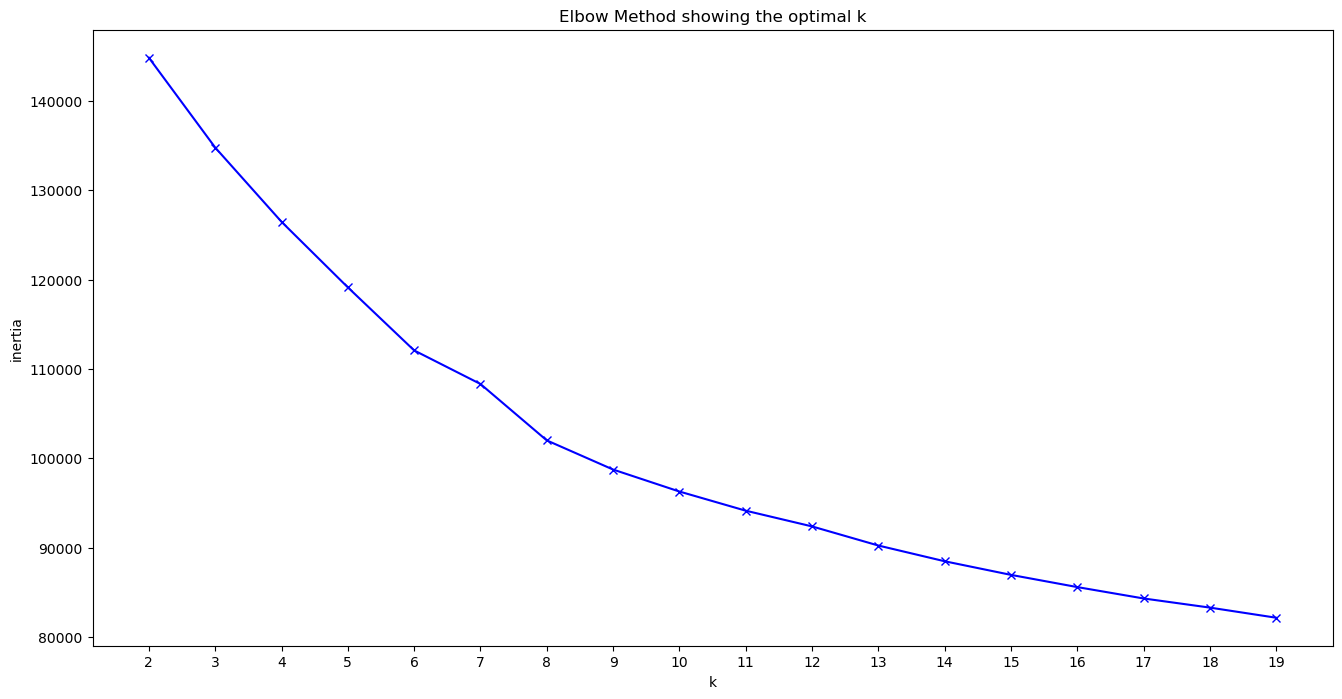

In [10]:
#Determine the Number of Clusters (K)

import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\Parinaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Parinaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Parinaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Parinaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

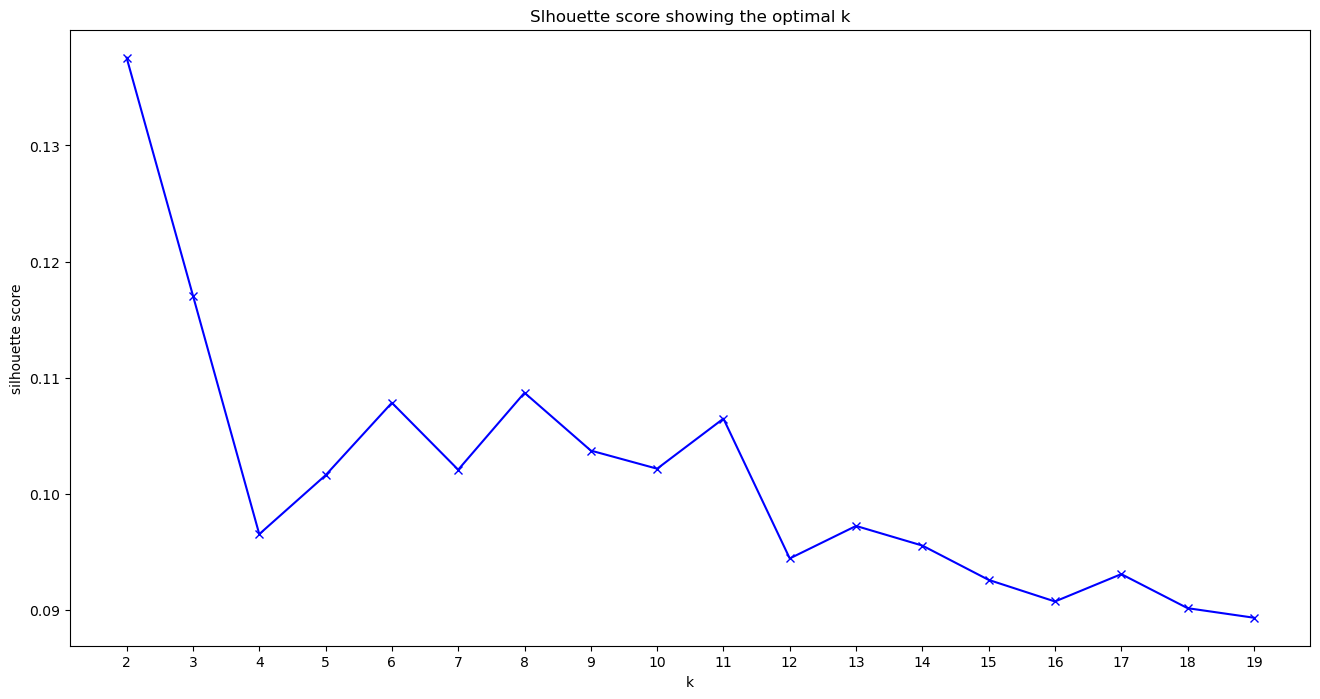

In [11]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

# Insights:

The elbow method suggested that there might be an inflection point in the sum of squared distances at  k=6. This is a common technique to identify a reasonable starting point for the number of clusters. While the elbow method is useful, it's not always definitive. The silhouette score is another metric that provides insight into the quality of the clusters. After considering the silhouette score, I found that k=8 resulted in clusters with good internal cohesion and separation, it justifies the choice.

The size of my dataset can influence the choice of k.With a larger dataset,I lean towards a higher k to capture more subtle patterns or variations in the data. So I chose k=10 to be justified if it allows for a more nuanced and detailed clustering representation, especially if there are diverse patterns within the data.

In [12]:
kmeans = KMeans(n_clusters=10, random_state=1234).fit(X_scaled)


C:\Users\Parinaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_scaled)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1162
1    1388
2     501
3     730
4    1686
5     498
6    1248
7    1988
8    2172
9    1308
dtype: int64

In [14]:
pickle.dump(kmeans, open('kmeans.pkl', 'wb'))

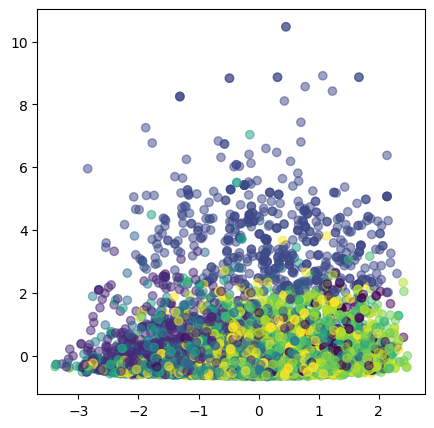

In [15]:
#plot data points
plt.figure(figsize=(5, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 5], c=clusters,alpha=0.5)
plt.show()

In [16]:
kmeans.inertia_    # The goal of k-means is to minimize this inertia-A lower inertia indicates that the points within a cluster are closer to the centroid, implying a more cohesive and tightly grouped cluster.

96286.94998379496

In [17]:
%%time
kmeans = KMeans(n_clusters=10,
                init="random",
                n_init= 100,  # try with 1, 4, 8, 20, 30, 100...Number of times the k-means algorithm will be run with different centroid seeds
                max_iter=10,   ## Maximum number of iterations for a single run
                tol=0,
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

96587.26099538198
CPU times: total: 28.1 s
Wall time: 5.97 s


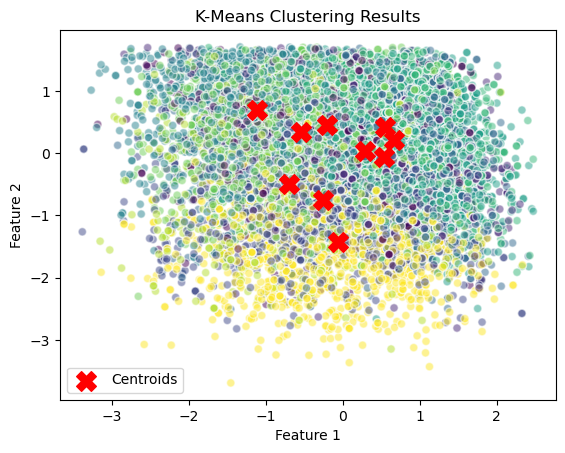

In [18]:
import matplotlib.pyplot as plt

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points with colors representing their clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='w')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [19]:
clusters

array([8, 7, 8, ..., 7, 9, 5])

In [20]:
#Define the cluster column
df_num['clusters']=clusters

In [21]:
df_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.755,0.553,6,-9.449,0,0.1070,0.04920,0.006070,0.0646,0.836,119.700,266600,4,8
1,0.667,0.667,7,-6.267,1,0.0388,0.00013,0.003850,0.0711,0.843,130.321,243213,4,7
2,0.826,0.601,10,-3.966,0,0.0515,0.19500,0.000003,0.0700,0.948,126.971,234000,4,8
3,0.905,0.945,4,-2.630,1,0.1370,0.03540,0.005290,0.0707,0.944,131.597,250693,4,7
4,0.797,0.536,11,-8.267,0,0.2660,0.03150,0.000029,0.1700,0.704,102.881,224800,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,0.759,0.121,7,-25.346,0,0.0284,0.41000,0.006100,0.0905,0.523,90.029,170667,4,9
12677,0.621,0.675,10,-9.347,0,0.0685,0.38500,0.033700,0.3470,0.323,124.056,237064,1,5
12678,0.781,0.812,7,-11.866,1,0.0468,0.01860,0.586000,0.0716,0.785,115.001,196027,4,7
12679,0.557,0.117,1,-13.880,1,0.0344,0.95000,0.000269,0.1120,0.122,111.742,223107,4,9


In [22]:
df_final=pd.concat([df_num,df_cat] , axis=1)

In [23]:
df_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,clusters,track.name,name,song_id,type,id,uri,track_href,analysis_url
0,0.755,0.553,6,-9.449,0,0.1070,0.04920,0.006070,0.0646,0.836,...,4,8,If I Ever Feel Better,Phoenix,3AA8xNhDC0MpqwkGX3EP5V,audio_features,3AA8xNhDC0MpqwkGX3EP5V,spotify:track:3AA8xNhDC0MpqwkGX3EP5V,https://api.spotify.com/v1/tracks/3AA8xNhDC0Mp...,https://api.spotify.com/v1/audio-analysis/3AA8...
1,0.667,0.667,7,-6.267,1,0.0388,0.00013,0.003850,0.0711,0.843,...,4,7,Dance To The Underground,Radio 4,2i8lRhmZNKaM1ypHwRybuD,audio_features,2i8lRhmZNKaM1ypHwRybuD,spotify:track:2i8lRhmZNKaM1ypHwRybuD,https://api.spotify.com/v1/tracks/2i8lRhmZNKaM...,https://api.spotify.com/v1/audio-analysis/2i8l...
2,0.826,0.601,10,-3.966,0,0.0515,0.19500,0.000003,0.0700,0.948,...,4,8,How We Do,Mount Sims,4flxgPC0426CEeSrzQIic0,audio_features,4flxgPC0426CEeSrzQIic0,spotify:track:4flxgPC0426CEeSrzQIic0,https://api.spotify.com/v1/tracks/4flxgPC0426C...,https://api.spotify.com/v1/audio-analysis/4flx...
3,0.905,0.945,4,-2.630,1,0.1370,0.03540,0.005290,0.0707,0.944,...,4,7,Fuck the Pain Away,Peaches,1XHFob24QklIXtLRopKirJ,audio_features,1XHFob24QklIXtLRopKirJ,spotify:track:1XHFob24QklIXtLRopKirJ,https://api.spotify.com/v1/tracks/1XHFob24QklI...,https://api.spotify.com/v1/audio-analysis/1XHF...
4,0.797,0.536,11,-8.267,0,0.2660,0.03150,0.000029,0.1700,0.704,...,4,2,Street Surgery 2,Zongamin,4JB847zlgViLq8tJIzRsZy,audio_features,4JB847zlgViLq8tJIzRsZy,spotify:track:4JB847zlgViLq8tJIzRsZy,https://api.spotify.com/v1/tracks/4JB847zlgViL...,https://api.spotify.com/v1/audio-analysis/4JB8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,0.759,0.121,7,-25.346,0,0.0284,0.41000,0.006100,0.0905,0.523,...,4,9,Hate Is an Attractive Force,SLEEP RADIO,1v6vHkDHBjm4OHUzeOKber,audio_features,1v6vHkDHBjm4OHUzeOKber,spotify:track:1v6vHkDHBjm4OHUzeOKber,https://api.spotify.com/v1/tracks/1v6vHkDHBjm4...,https://api.spotify.com/v1/audio-analysis/1v6v...
12677,0.621,0.675,10,-9.347,0,0.0685,0.38500,0.033700,0.3470,0.323,...,1,5,Promises,Dorian Concept,5TN8n4LQS8Or2WEnU56pXs,audio_features,5TN8n4LQS8Or2WEnU56pXs,spotify:track:5TN8n4LQS8Or2WEnU56pXs,https://api.spotify.com/v1/tracks/5TN8n4LQS8Or...,https://api.spotify.com/v1/audio-analysis/5TN8...
12678,0.781,0.812,7,-11.866,1,0.0468,0.01860,0.586000,0.0716,0.785,...,4,7,16 Beat,Metronomy,6MEzr1cmAJi3FXBjXVXMnm,audio_features,6MEzr1cmAJi3FXBjXVXMnm,spotify:track:6MEzr1cmAJi3FXBjXVXMnm,https://api.spotify.com/v1/tracks/6MEzr1cmAJi3...,https://api.spotify.com/v1/audio-analysis/6MEz...
12679,0.557,0.117,1,-13.880,1,0.0344,0.95000,0.000269,0.1120,0.122,...,4,9,Amplified In The Silence,Manchester Orchestra,6ovSjbBKatyx9KvWsxkAZo,audio_features,6ovSjbBKatyx9KvWsxkAZo,spotify:track:6ovSjbBKatyx9KvWsxkAZo,https://api.spotify.com/v1/tracks/6ovSjbBKatyx...,https://api.spotify.com/v1/audio-analysis/6ovS...


In [24]:
# In order to handling the error I convert the values in a specific column to lowercase
df_final["name"] = df_final["name"].str.lower()
df_final["track.name"] = df_final["track.name"].str.lower()

In [25]:
df_final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,clusters,track.name,name,song_id,type,id,uri,track_href,analysis_url
0,0.755,0.553,6,-9.449,0,0.1070,0.04920,0.006070,0.0646,0.836,...,4,8,if i ever feel better,phoenix,3AA8xNhDC0MpqwkGX3EP5V,audio_features,3AA8xNhDC0MpqwkGX3EP5V,spotify:track:3AA8xNhDC0MpqwkGX3EP5V,https://api.spotify.com/v1/tracks/3AA8xNhDC0Mp...,https://api.spotify.com/v1/audio-analysis/3AA8...
1,0.667,0.667,7,-6.267,1,0.0388,0.00013,0.003850,0.0711,0.843,...,4,7,dance to the underground,radio 4,2i8lRhmZNKaM1ypHwRybuD,audio_features,2i8lRhmZNKaM1ypHwRybuD,spotify:track:2i8lRhmZNKaM1ypHwRybuD,https://api.spotify.com/v1/tracks/2i8lRhmZNKaM...,https://api.spotify.com/v1/audio-analysis/2i8l...
2,0.826,0.601,10,-3.966,0,0.0515,0.19500,0.000003,0.0700,0.948,...,4,8,how we do,mount sims,4flxgPC0426CEeSrzQIic0,audio_features,4flxgPC0426CEeSrzQIic0,spotify:track:4flxgPC0426CEeSrzQIic0,https://api.spotify.com/v1/tracks/4flxgPC0426C...,https://api.spotify.com/v1/audio-analysis/4flx...
3,0.905,0.945,4,-2.630,1,0.1370,0.03540,0.005290,0.0707,0.944,...,4,7,fuck the pain away,peaches,1XHFob24QklIXtLRopKirJ,audio_features,1XHFob24QklIXtLRopKirJ,spotify:track:1XHFob24QklIXtLRopKirJ,https://api.spotify.com/v1/tracks/1XHFob24QklI...,https://api.spotify.com/v1/audio-analysis/1XHF...
4,0.797,0.536,11,-8.267,0,0.2660,0.03150,0.000029,0.1700,0.704,...,4,2,street surgery 2,zongamin,4JB847zlgViLq8tJIzRsZy,audio_features,4JB847zlgViLq8tJIzRsZy,spotify:track:4JB847zlgViLq8tJIzRsZy,https://api.spotify.com/v1/tracks/4JB847zlgViL...,https://api.spotify.com/v1/audio-analysis/4JB8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12676,0.759,0.121,7,-25.346,0,0.0284,0.41000,0.006100,0.0905,0.523,...,4,9,hate is an attractive force,sleep radio,1v6vHkDHBjm4OHUzeOKber,audio_features,1v6vHkDHBjm4OHUzeOKber,spotify:track:1v6vHkDHBjm4OHUzeOKber,https://api.spotify.com/v1/tracks/1v6vHkDHBjm4...,https://api.spotify.com/v1/audio-analysis/1v6v...
12677,0.621,0.675,10,-9.347,0,0.0685,0.38500,0.033700,0.3470,0.323,...,1,5,promises,dorian concept,5TN8n4LQS8Or2WEnU56pXs,audio_features,5TN8n4LQS8Or2WEnU56pXs,spotify:track:5TN8n4LQS8Or2WEnU56pXs,https://api.spotify.com/v1/tracks/5TN8n4LQS8Or...,https://api.spotify.com/v1/audio-analysis/5TN8...
12678,0.781,0.812,7,-11.866,1,0.0468,0.01860,0.586000,0.0716,0.785,...,4,7,16 beat,metronomy,6MEzr1cmAJi3FXBjXVXMnm,audio_features,6MEzr1cmAJi3FXBjXVXMnm,spotify:track:6MEzr1cmAJi3FXBjXVXMnm,https://api.spotify.com/v1/tracks/6MEzr1cmAJi3...,https://api.spotify.com/v1/audio-analysis/6MEz...
12679,0.557,0.117,1,-13.880,1,0.0344,0.95000,0.000269,0.1120,0.122,...,4,9,amplified in the silence,manchester orchestra,6ovSjbBKatyx9KvWsxkAZo,audio_features,6ovSjbBKatyx9KvWsxkAZo,spotify:track:6ovSjbBKatyx9KvWsxkAZo,https://api.spotify.com/v1/tracks/6ovSjbBKatyx...,https://api.spotify.com/v1/audio-analysis/6ovS...


In [26]:
df_final.to_csv('playlist.csv', index=False)



# Part 4: Song Recommender

In [41]:
# Stablishing  spotify connection

def open_spotify_connection():
    secrets_file = open("secrets.txt","r")   
    string = secrets_file.read()
    secrets_dict={}
    for line in string.split('\n'):
        if len(line) > 0:
            #print(line.split(':'))
            secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))
    return sp;

In [30]:
#read my dfs:
top_200_songs=pd.read_csv("hot_songs.csv")

playlist_clustered=pd.read_csv('playlist.csv')

In [31]:
pd.set_option('display.max_rows', None)


In [32]:
#change column name of the hot_sogs
# top_200_songs.columns=['title','artist']

In [33]:
display(top_200_songs.head(3))
display(playlist_clustered.head(3))

,title,artist
0,cruel summer,taylor swift
1,lovin on me,jack harlow
2,paint the town red,doja cat


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,clusters,track.name,name,song_id,type,id,uri,track_href,analysis_url
0,0.755,0.553,6,-9.449,0,0.1070,0.04920,0.006070,0.0646,0.836,...,4,8,if i ever feel better,phoenix,3AA8xNhDC0MpqwkGX3EP5V,audio_features,3AA8xNhDC0MpqwkGX3EP5V,spotify:track:3AA8xNhDC0MpqwkGX3EP5V,https://api.spotify.com/v1/tracks/3AA8xNhDC0Mp...,https://api.spotify.com/v1/audio-analysis/3AA8...
1,0.667,0.667,7,-6.267,1,0.0388,0.00013,0.003850,0.0711,0.843,...,4,7,dance to the underground,radio 4,2i8lRhmZNKaM1ypHwRybuD,audio_features,2i8lRhmZNKaM1ypHwRybuD,spotify:track:2i8lRhmZNKaM1ypHwRybuD,https://api.spotify.com/v1/tracks/2i8lRhmZNKaM...,https://api.spotify.com/v1/audio-analysis/2i8l...
2,0.826,0.601,10,-3.966,0,0.0515,0.19500,0.000003,0.0700,0.948,...,4,8,how we do,mount sims,4flxgPC0426CEeSrzQIic0,audio_features,4flxgPC0426CEeSrzQIic0,spotify:track:4flxgPC0426CEeSrzQIic0,https://api.spotify.com/v1/tracks/4flxgPC0426C...,https://api.spotify.com/v1/audio-analysis/4flx...


In [34]:
playlist_clustered.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'clusters', 'track.name', 'name',
       'song_id', 'type', 'id', 'uri', 'track_href', 'analysis_url'],
      dtype='object')

In [35]:
# top_200_songs['artist'].unique()

In [36]:
# unique_names =playlist_clustered['name'].unique()


In [59]:
playlist_clustered['name']

0                                                  phoenix
1                                                  radio 4
2                                               mount sims
3                                                  peaches
4                                                 zongamin
5                                           fischerspooner
6                                       the postal service
7                                       the postal service
8                                       the postal service
9                                             electric six
10                                            electric six
11                                            audio bullys
12                                           basement jaxx
13                                            lisa kekaula
14                                          death in vegas
15                                          death in vegas
16                                                kasabi

In [38]:
# playlist_clustered['track.name']

# # Initial recommender : 

In [ ]:
# track = input("Which song cheers you up today? ")

# if track.isdigit():
#     print("Invalid input.")

# elif (top_200_songs['title'].str.lower().str.contains(str(track).lower()).any() == True) or(top_200_songs['artist'].str.lower().str.contains(str(track).lower()).any() == True):
#     print('Great choice! ')
#     print(top_200_songs['title'].sample().squeeze())
    
# else:
#     sp = open_spotify_connection()
#     results = sp.search(q="track:" + track, type="track")
#     song_uri = results['tracks']['items'][0]['uri'].split(':')[2]  #get playlist id 
#     song_features = sp.audio_features(song_uri)
#     new = pd.DataFrame.from_dict(song_features)
#     y_pred = new.drop(columns=['type', 'id' , 'uri', 'track_href', 'analysis_url'])
#     y_scaled = X_prep.transform(y_pred)
#     y_scaled = pd.DataFrame(y_scaled,columns=y_pred.columns)
#     look_for = kmeans.predict(y_scaled)
    
#     print("Here's what I found for you!!!")
    
#     # choose a random row from the playlist with the same cluster
#     print(playlist_clustered.loc[playlist_clustered.clusters == look_for[0],['track.name','name','uri']].sample(1).squeeze())


# Improvement version:

In [56]:
def song_recommender(title):
    # Convert the user input and song names to lowercase for case-insensitive comparison
    user_input_song_lower = user_input_song.lower()
#     top_chart_songs_lower = popv_hot_100.apply(lambda x: x.str.lower())
    # Check if the user-inputted song is in the top chart songs list (case-insensitive)
    if user_input_song_lower in top_200_songs['title'].values:
        # Filter out the user-inputted song from the DataFrame
        top_chart_songs_without_input = top_200_songs[top_200_songs['title'] != user_input_song_lower]
        # Recommend a random song from the filtered DataFrame
        recommended_song = top_chart_songs_without_input.sample().squeeze()
        print(f"That's a Hot song! You might also like: {recommended_song['title']} by {recommended_song['artist']}")
    else:
        #open spotify connection
        sp = open_spotify_connection()
        # Query Spotify
        results = sp.search(q=f"track:{user_input_song_lower}", type="track", limit=1)
        # Check if the query returns results (i.e., total > 0)
        if results['tracks']['total'] != 0:
            track_id = results['tracks']['items'][0]['id']
            #print(track_id)
            new_data = sp.audio_features(track_id)
            data_df = json_normalize(new_data[0])
            num_data_df = data_df.select_dtypes(include='number')
            # Use pickle to get the existing scaler and kmeans 
            kmeans = pickle.load(open('kmeans.pkl', 'rb'))
            scaler = pickle.load(open('X_prep.pickle', 'rb'))
            scaler = scaler.transform(num_data_df)
            predicted_cluster = kmeans.predict(scaler)
            cluster = predicted_cluster[0]
            #print (cluster)
            rec_song = playlist_clustered[playlist_clustered.clusters == cluster].sample().squeeze()
            print(f"That's in my spotify_list!You might also like: {rec_song['track.name']} by {rec_song['name']}")
        else:
            print("The song is not in Spotify. Please try again")


In [63]:
# Get User Input
user_input_song = input("Enter a song: ")
song_recommender(user_input_song)



Enter a song: taylor swift
That's in my spotify_list!You might also like: ghosts - single edit by ladytron
